In [51]:
from importlib import reload
import sys
import os
sys.path.append(os.path.abspath('../'))
import util

In [52]:
reload(util)
r0d0 = util.load_data(0,0)

# Kelp

In [53]:
kelp_raw = r0d0[r0d0['product'] == 'KELP'].set_index('timestamp')
kelp_raw.index = kelp_raw.index/1000

<Axes: xlabel='timestamp'>

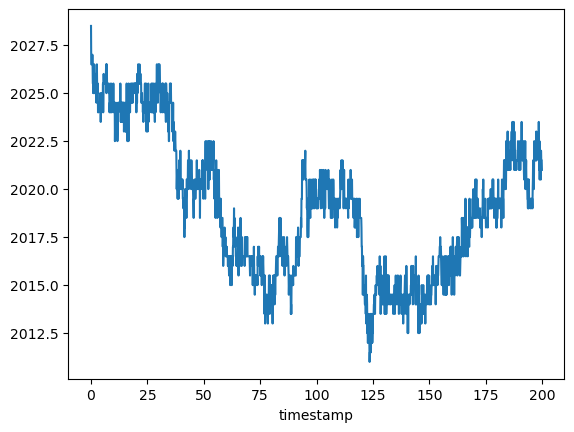

In [54]:
kelp_raw['mid_price'].plot()

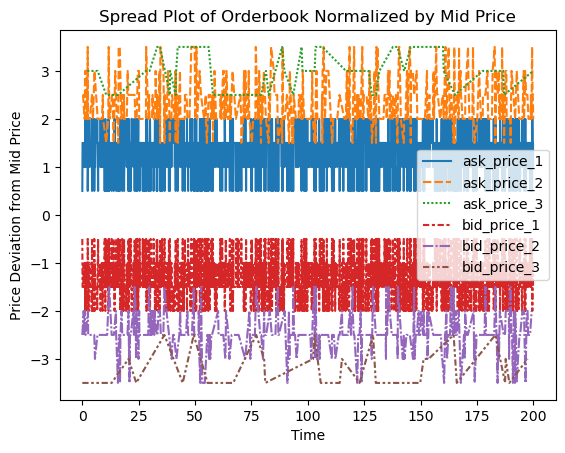

In [55]:
reload(util)
util.spread_plot(kelp_raw)

In [57]:
reload(util)
kelp_raw['vwap'] = util.get_vwap(kelp_raw)

<Axes: xlabel='timestamp'>

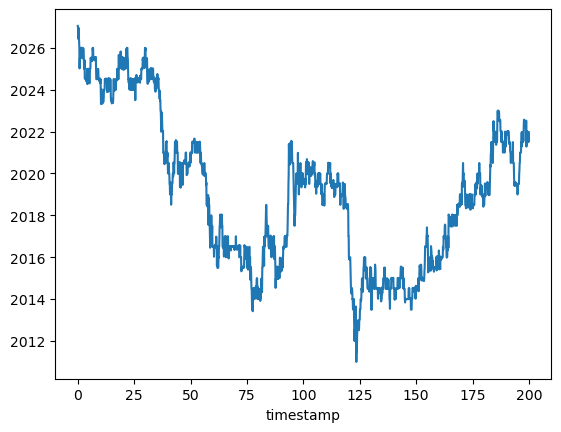

In [58]:
kelp_raw['vwap'].plot()

<Axes: xlabel='timestamp'>

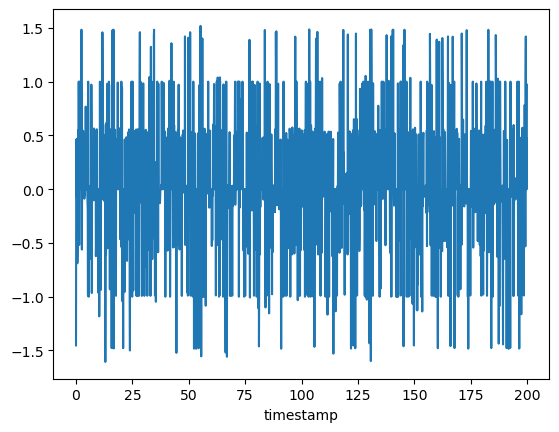

In [60]:
(kelp_raw['vwap'] - kelp_raw['mid_price']).plot()